In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [2]:
spark = SparkSession.builder.appName("CSVImportExample").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/05 03:24:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.csv("BankChurners_1.csv", header=True, inferSchema=True)
df.show(truncate=False)

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|Attrition_Flag   |Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [4]:
from pyspark.sql import SparkSession
import pandas as pd
df_desc = df.summary()
df_desc.show()

23/10/05 03:24:47 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------------+-----------------+-----------------+------+------------------+---------------+--------------+---------------+-------------+------------------+------------------------+----------------------+---------------------+-----------------+-------------------+-----------------+--------------------+-----------------+-----------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|summary|          CLIENTNUM|   Attrition_Flag|     Customer_Age|Gender|   Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|    Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|     Credit_Limit|Total_Revolving_Bal|  Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|  Total_Trans_Amt|   To

In [5]:
df.printSchema()
row_count = df.count()
num_columns = len(df.columns)
print (row_count,num_columns)

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: string (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nu

In [6]:
# Convert summary results to Pandas DataFrame
summary_df = df.summary().toPandas()

summary_df = summary_df.transpose()
new_header = summary_df.iloc[0]
summary_df = summary_df[1:]
summary_df.columns = new_header

summary_df

summary,count,mean,stddev,min,25%,50%,75%,max
CLIENTNUM,10127,7.391776063336625E8,3.690378345023116E7,708082083,713032233,717924933,773140683,828343083
Attrition_Flag,10127,None,None,Attrited Customer,None,None,None,Existing Customer
Customer_Age,10127,46.32596030413745,8.016814032549046,26,41,46,52,73
Gender,10127,None,None,F,None,None,None,Male
Dependent_count,10127,2.3462032191172115,1.29890834890379,0,1,2,3,5
Education_Level,10127,None,None,College,None,None,None,Unknown
Marital_Status,10127,None,None,Divorced,None,None,None,Unknown
Income_Category,10127,None,None,$120K +,None,None,None,Unknown
Card_Category,10127,None,None,Blue,None,None,None,Silver
Months_on_book,10127,35.928409203120374,7.98641633087208,13,31,36,40,56


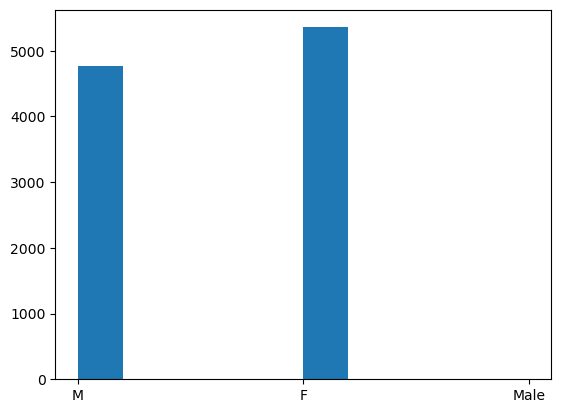

In [7]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Convert sex to an array using Numpy and plot it using pyplot. 
sexArr = np.array(df.select('Gender').collect())
plt.hist(sexArr)
plt.show()

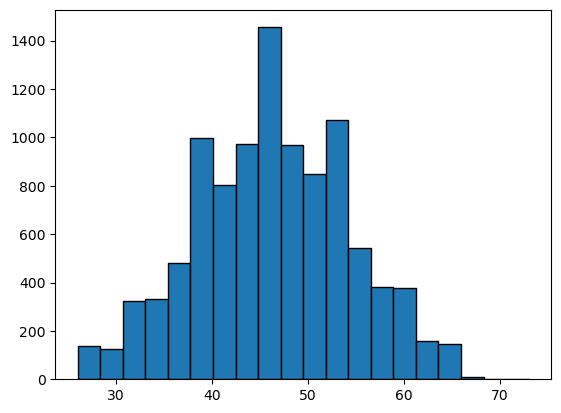

In [8]:
customer_age_arr = np.array(df.select('Customer_Age').collect())

plt.hist(customer_age_arr, bins=20, edgecolor='k')
plt.show()

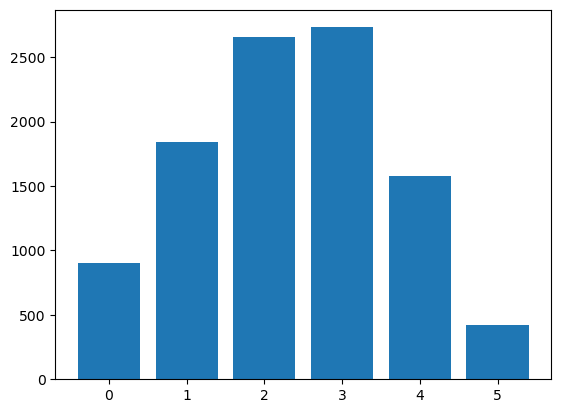

In [9]:
dependent_count_arr = np.array(df.select('Dependent_count').collect())
unique_values, value_counts = np.unique(dependent_count_arr, return_counts=True)

plt.bar(unique_values, value_counts)
plt.show()

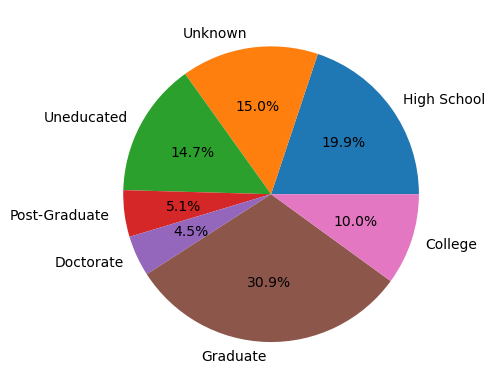

In [10]:
from collections import Counter

#Using Spark DataFrame to Calculate Counts for Different Education Levels
education_counts = df.groupBy('Education_Level').count().toPandas()

education_counts_dict = dict(zip(education_counts['Education_Level'], education_counts['count']))

plt.pie(education_counts_dict.values(), labels=education_counts_dict.keys(), autopct='%1.1f%%')
plt.show()

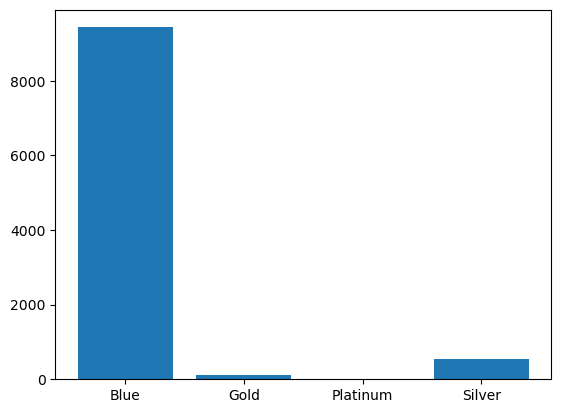

In [11]:
Card_Category_count_arr = np.array(df.select('Card_Category').collect())

unique_values, value_counts = np.unique(Card_Category_count_arr, return_counts=True)

plt.bar(unique_values, value_counts)
plt.show()

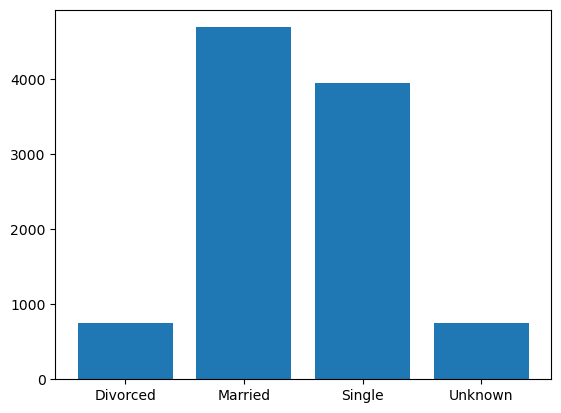

In [12]:
Marital_count_arr = np.array(df.select('Marital_Status').collect())

unique_values, value_counts = np.unique(Marital_count_arr, return_counts=True)

plt.bar(unique_values, value_counts)
plt.show()

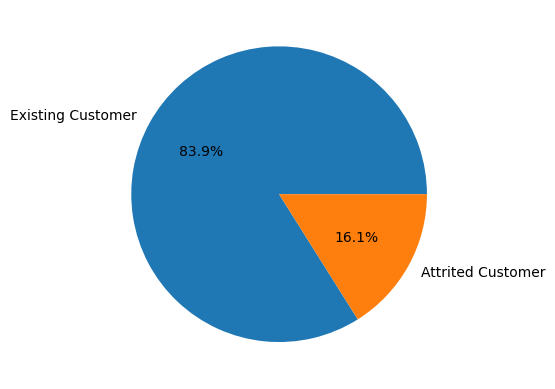

In [13]:
Attrition_counts = df.groupBy('Attrition_Flag').count().toPandas()

Attrition_counts_dict = dict(zip(Attrition_counts['Attrition_Flag'], Attrition_counts['count']))

plt.pie(Attrition_counts_dict.values(), labels=Attrition_counts_dict.keys(), autopct='%1.1f%%')
plt.show()

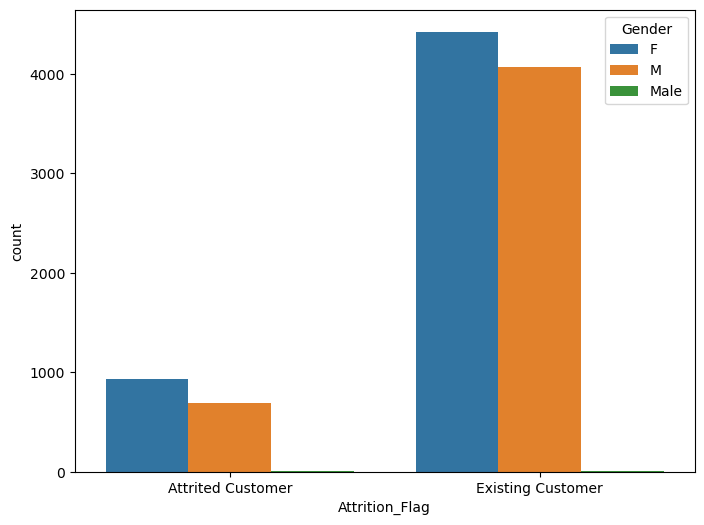

In [14]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
import seaborn as sns

count_data = df.groupBy('Attrition_Flag', 'Gender').agg(F.count('*').alias('count')).orderBy('Attrition_Flag', 'Gender')

count_data = count_data.toPandas()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Attrition_Flag', y='count', hue='Gender', data=count_data)
plt.show()

In [15]:
#2.4 Verify the data quality

In [16]:
columns_to_drop = ["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
df = df.drop(*columns_to_drop)

df.show()
df.printSchema()
row_count = df.count()
num_columns = len(df.columns)
print (row_count,num_columns)

+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+
|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|
+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+--------

In [17]:
from pyspark.sql.functions import col, median, when

# Calculate Avg_Utilization_Ratio Median of Ratio column
median_value = df.selectExpr('percentile_approx(Avg_Utilization_Ratio, 0.5)').collect()[0][0]

# Using the fill method to fill in missing values as the median
df = df.withColumn('Avg_Utilization_Ratio', when(col('Avg_Utilization_Ratio').isNull(), median_value).otherwise(col('Avg_Utilization_Ratio')))

summary_df = df.summary().toPandas()

summary_df = summary_df.transpose()
new_header = summary_df.iloc[0]
summary_df = summary_df[1:]
summary_df.columns = new_header

summary_df

summary,count,mean,stddev,min,25%,50%,75%,max
Attrition_Flag,10127,None,None,Attrited Customer,None,None,None,Existing Customer
Customer_Age,10127,46.32596030413745,8.016814032549046,26,41,46,52,73
Gender,10127,None,None,F,None,None,None,Male
Dependent_count,10127,2.3462032191172115,1.29890834890379,0,1,2,3,5
Education_Level,10127,None,None,College,None,None,None,Unknown
Marital_Status,10127,None,None,Divorced,None,None,None,Unknown
Income_Category,10127,None,None,$120K +,None,None,None,Unknown
Card_Category,10127,None,None,Blue,None,None,None,Silver
Months_on_book,10127,35.928409203120374,7.98641633087208,13,31,36,40,56
Total_Relationship_Count,10127,3.8125802310654686,1.55440786533883,1,3,4,5,6


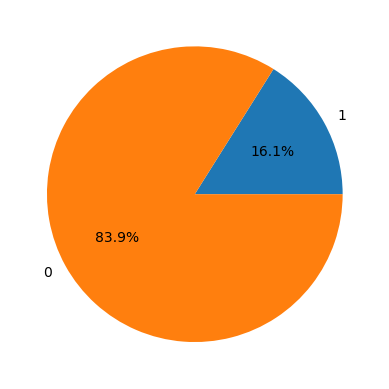

In [18]:
# Use the withColumn and when functions to set Attachment_ Convert the value of the Flag column to 0 and 1
df = df.withColumn("Attrition_Flag", when(df["Attrition_Flag"] == "Existing Customer", 0).otherwise(1))

#show the results
Attrition_counts = df.groupBy('Attrition_Flag').count().toPandas()

Attrition_counts_dict = dict(zip(Attrition_counts['Attrition_Flag'], Attrition_counts['count']))

plt.pie(Attrition_counts_dict.values(), labels=Attrition_counts_dict.keys(), autopct='%1.1f%%')
plt.show()

23/10/05 03:25:16 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


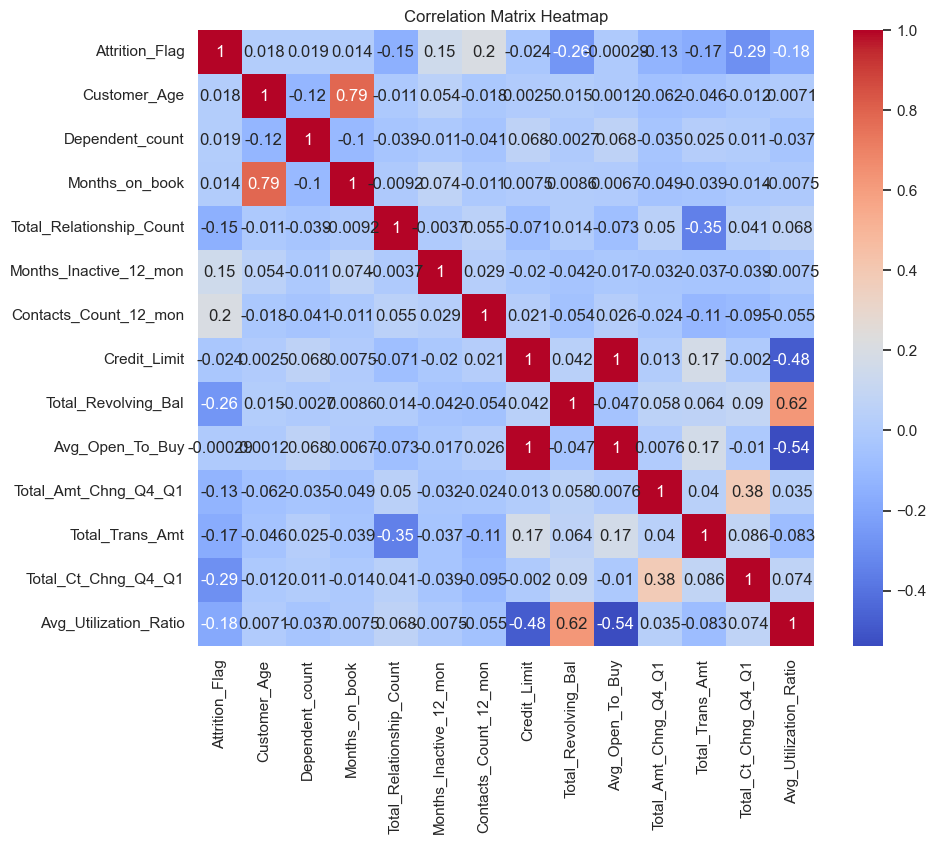

In [19]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.types import StringType

numeric_data_types = ['int', 'double', 'float', 'long']

# Select a subset that only contains numerical columns
numeric_columns = [col_name for col_name, data_type in df.dtypes if data_type.lower() in numeric_data_types]
df_numeric = df.select(numeric_columns)

from pyspark.ml.feature import VectorAssembler

vector_assembler = VectorAssembler(inputCols=df_numeric.columns, outputCol="features")
df_assembled = vector_assembler.transform(df_numeric).select("features")

# Using Correlation to Calculate Correlation
from pyspark.ml.stat import Correlation

correlation_matrix = Correlation.corr(df_assembled, "features").head()[0]

# Convert the correlation matrix to Pandas DataFrame for display
import pandas as pd

correlation_matrix_df = pd.DataFrame(correlation_matrix.toArray(), columns=df_numeric.columns, index=df_numeric.columns)

# Display correlation matrix

sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df, annot=True, cmap="coolwarm", square=True)

plt.title("Correlation Matrix Heatmap")

plt.show()

In [20]:
# 3.2 Cleaning the data

In [21]:
# Convert summary results to Pandas DataFrame
summary_df = df.summary().toPandas()

summary_df = summary_df.transpose()
new_header = summary_df.iloc[0]
summary_df = summary_df[1:]
summary_df.columns = new_header

summary_df

summary,count,mean,stddev,min,25%,50%,75%,max
Attrition_Flag,10127,0.1606596227905599,0.3672348368711593,0,0,0,0,1
Customer_Age,10127,46.32596030413745,8.016814032549046,26,41,46,52,73
Gender,10127,None,None,F,None,None,None,Male
Dependent_count,10127,2.3462032191172115,1.29890834890379,0,1,2,3,5
Education_Level,10127,None,None,College,None,None,None,Unknown
Marital_Status,10127,None,None,Divorced,None,None,None,Unknown
Income_Category,10127,None,None,$120K +,None,None,None,Unknown
Card_Category,10127,None,None,Blue,None,None,None,Silver
Months_on_book,10127,35.928409203120374,7.98641633087208,13,31,36,40,56
Total_Relationship_Count,10127,3.8125802310654686,1.55440786533883,1,3,4,5,6


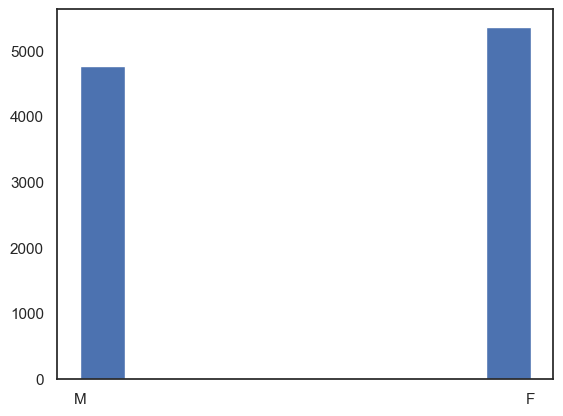

In [22]:
df = df.withColumn('Gender', when(df['Gender'] == 'Male', 'M').otherwise(df['Gender']))
sexArr = np.array(df.select('Gender').collect())
plt.hist(sexArr)
plt.show()

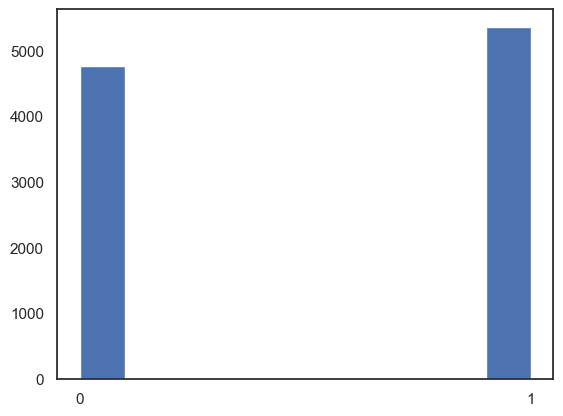

In [23]:
df = df.withColumn('Gender', when(col('Gender') == 'F', 1).when(col('Gender') == 'M', 0).otherwise(col('Gender')))
sexArr = np.array(df.select('Gender').collect())
plt.hist(sexArr)
plt.show()

In [24]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.sql.window import Window
from pyspark.sql.functions import percentile_approx

# Replace 'aa' with missing value (None)
df = df.withColumn('Total_Trans_Ct', when(col('Total_Trans_Ct') == 'aa', None).otherwise(col('Total_Trans_Ct')))

In [25]:
# Calculate 'Total'_ Trans_ Median of Ct 'column
median_value = df.selectExpr('percentile_approx(Total_Trans_Ct, 0.5)').collect()[0][0]

print(median_value)

67.0


In [26]:
# Fill in missing values as median
df = df.withColumn('Total_Trans_Ct', when(col('Total_Trans_Ct').isNull(), median_value).otherwise(col('Total_Trans_Ct')))

summary_df = df.summary().toPandas()
summary_df

,summary,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,count,10127,10127,10127,10127,10127,10127,10127,10127,10127,...,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127
1,mean,0.1606596227905599,46.32596030413745,0.5290806754221389,2.3462032191172115,None,None,None,None,35.928409203120374,...,2.3411671768539546,2.4553174681544387,8631.953698034848,1162.8140614199665,7469.139636614887,0.7599406536980376,4404.086303939963,64.85889207070208,0.7122223758269962,0.2748970079984201
2,stddev,0.3672348368711593,8.016814032549046,0.4991782444381386,1.29890834890379,None,None,None,None,7.98641633087208,...,1.0106223994182844,1.1062251426359249,9088.776650223148,814.9873352357533,9090.685323679114,0.2192067692307027,3397.129253557085,23.472580051983318,0.23808609133294137,0.2756899974192098
3,min,0,26,0,0,College,Divorced,$120K +,Blue,13,...,0,0,1438.3,0,3.0,0.0,510,10,0.0,0.0
4,25%,0,41,0.0,1,None,None,None,None,31,...,2,2,2555.0,357,1322.0,0.631,2155,45.0,0.581,0.022
5,50%,0,46,1.0,2,None,None,None,None,36,...,2,2,4549.0,1276,3472.0,0.736,3899,67.0,0.702,0.175
6,75%,0,52,1.0,3,None,None,None,None,40,...,3,3,11067.0,1784,9857.0,0.859,4741,81.0,0.818,0.503
7,max,1,73,1,5,Unknown,Unknown,Unknown,Silver,56,...,6,6,34516.0,2517,34516.0,3.397,18484,99,3.714,0.999


In [27]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer

In [28]:
string_features = ["Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

indexers = [StringIndexer(inputCol=feature, outputCol=feature + "_index") for feature in string_features]

indexed_df = df
for indexer in indexers:
    indexed_df = indexer.fit(indexed_df).transform(indexed_df)

indexed_df.show()


+--------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+---------------------+--------------------+---------------------+-------------------+
|Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Education_Level_index|Marital_Status_index|Income_Category_index|Card_Category_index|
+--------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------

In [29]:
columns_to_drop = ["Education_Level", "Marital_Status", "Income_Category", "Card_Category"]
indexed_df = indexed_df.drop(*columns_to_drop)

In [30]:
indexed_df.printSchema()
row_count1 = indexed_df.count()
num_columns1 = len(indexed_df.columns)
print (row_count1,num_columns1)

root
 |-- Attrition_Flag: integer (nullable = false)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: string (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = false)
 |-- Card_Category_index: double (nullable = fals

In [31]:
indexed_df = indexed_df.withColumn("Total_Trans_Ct", col("Total_Trans_Ct").cast("int"))

In [32]:
indexed_df = indexed_df.withColumn("Gender", col("Gender").cast("int"))

In [33]:
indexed_df.printSchema()

root
 |-- Attrition_Flag: integer (nullable = false)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = false)
 |-- Card_Category_index: double (nullable = fa

In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col
from pyspark.sql.types import StringType

age_bins = [25, 35, 45, 55, 65, float('inf')]
age_labels = ['25-34', '35-44', '45-54', '55-64', '65+']

expr = (
    when((col("Customer_Age") >= age_bins[0]) & (col("Customer_Age") < age_bins[1]), age_labels[0])
    .when((col("Customer_Age") >= age_bins[1]) & (col("Customer_Age") < age_bins[2]), age_labels[1])
    .when((col("Customer_Age") >= age_bins[2]) & (col("Customer_Age") < age_bins[3]), age_labels[2])
    .when((col("Customer_Age") >= age_bins[3]) & (col("Customer_Age") < age_bins[4]), age_labels[3])
    .when(col("Customer_Age") >= age_bins[4], age_labels[4])
    .otherwise("Unknown")
    .cast(StringType())
)

indexed_df = indexed_df.withColumn("Age_Group", expr)

indexed_df.select("Customer_Age", "Age_Group").show()

+------------+---------+
|Customer_Age|Age_Group|
+------------+---------+
|          45|    45-54|
|          49|    45-54|
|          51|    45-54|
|          40|    35-44|
|          40|    35-44|
|          44|    35-44|
|          51|    45-54|
|          32|    25-34|
|          37|    35-44|
|          48|    45-54|
|          42|    35-44|
|          65|      65+|
|          56|    55-64|
|          35|    35-44|
|          57|    55-64|
|          44|    35-44|
|          48|    45-54|
|          41|    35-44|
|          61|    55-64|
|          45|    45-54|
+------------+---------+
only showing top 20 rows



In [35]:
book_bins = [12, 24, 36, 48, float('inf')]
book_labels = ['1-2year', '2-3year', '3-4year', '4year+']

expr = (
    when((col("Months_on_book") >= book_bins[0]) & (col("Months_on_book") < book_bins[1]), book_labels[0])
    .when((col("Months_on_book") >= book_bins[1]) & (col("Months_on_book") < book_bins[2]), book_labels[1])
    .when((col("Months_on_book") >= book_bins[2]) & (col("Months_on_book") < book_bins[3]), book_labels[2])
    .when(col("Months_on_book") >= book_bins[3], book_labels[3])
    .otherwise("Unknown")
    .cast(StringType())
)

indexed_df = indexed_df.withColumn("Register_Group", expr)

indexed_df.select("Months_on_book", "Register_Group").show()


+--------------+--------------+
|Months_on_book|Register_Group|
+--------------+--------------+
|            39|       3-4year|
|            44|       3-4year|
|            36|       3-4year|
|            34|       2-3year|
|            21|       1-2year|
|            36|       3-4year|
|            46|       3-4year|
|            27|       2-3year|
|            36|       3-4year|
|            36|       3-4year|
|            31|       2-3year|
|            54|        4year+|
|            36|       3-4year|
|            30|       2-3year|
|            48|        4year+|
|            37|       3-4year|
|            36|       3-4year|
|            34|       2-3year|
|            56|        4year+|
|            37|       3-4year|
+--------------+--------------+
only showing top 20 rows



In [36]:
indexed_df.printSchema()

root
 |-- Attrition_Flag: integer (nullable = false)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = false)
 |-- Card_Category_index: double (nullable = fa

In [37]:
data_source1 = spark.read.csv("BankChurners_1.csv", header=True, inferSchema=True)
data_source2 = spark.read.csv("BankChurners_2.csv", header=True, inferSchema=True)

integrated_data = data_source1.join(data_source2, 'CLIENTNUM', 'inner')

integrated_data.show()

integrated_data.write.csv("integrated_data.csv", header=True, mode='overwrite')

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+---------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_C

In [38]:
indexed_df.printSchema()

root
 |-- Attrition_Flag: integer (nullable = false)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = false)
 |-- Card_Category_index: double (nullable = fa

In [39]:
age_indexer = StringIndexer(inputCol="Age_Group", outputCol="Age_Group_Index")
indexed_df = age_indexer.fit(indexed_df).transform(indexed_df)

In [40]:
register_indexer = StringIndexer(inputCol="Register_Group", outputCol="Register_Group_Index")
indexed_df = register_indexer.fit(indexed_df).transform(indexed_df)

In [41]:
columns_to_drop = ["Age_Group", "Register_Group"]
indexed_df = indexed_df.drop(*columns_to_drop)

In [42]:
indexed_df.printSchema()

root
 |-- Attrition_Flag: integer (nullable = false)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = false)
 |-- Card_Category_index: double (nullable = fa

In [43]:
columns_to_drop = ["features"]
indexed_df = indexed_df.drop(*columns_to_drop)

In [44]:
summary_indexed_df = indexed_df.summary().toPandas()
summary_indexed_df

,summary,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_index,Marital_Status_index,Income_Category_index,Card_Category_index,Age_Group_Index,Register_Group_Index
0,count,10127,10127,10127,10127,10127,10127,10127,10127,10127,...,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127
1,mean,0.1606596227905599,46.32596030413745,0.5290806754221389,2.3462032191172115,35.928409203120374,3.8125802310654686,2.3411671768539546,2.4553174681544387,8631.953698034848,...,4404.086303939963,64.85889207070208,0.7122223758269962,0.2748970079984201,1.8613607188703467,0.7588624469240643,1.693393897501728,0.08363779994075245,0.8973042362002568,0.6724597610348573
2,stddev,0.3672348368711593,8.016814032549046,0.4991782444381386,1.29890834890379,7.98641633087208,1.55440786533883,1.0106223994182844,1.1062251426359249,9088.776650223148,...,3397.129253557085,23.472580051983318,0.23808609133294137,0.2756899974192098,1.770156357626571,0.8798635099308855,1.647213126919835,0.333784490443541,0.9773858367269878,0.8880974426730776
3,min,0,26,0,0,13,1,0,0,1438.3,...,510,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25%,0,41,0,1,31,3,2,2,2555.0,...,2155,45,0.581,0.022,0.0,0.0,0.0,0.0,0.0,0.0
5,50%,0,46,1,2,36,4,2,2,4549.0,...,3899,67,0.702,0.175,1.0,1.0,1.0,0.0,1.0,0.0
6,75%,0,52,1,3,40,5,3,3,11067.0,...,4741,81,0.818,0.503,3.0,1.0,3.0,0.0,1.0,1.0
7,max,1,73,1,5,56,6,6,6,34516.0,...,18484,139,3.714,0.999,6.0,3.0,5.0,3.0,4.0,3.0


In [134]:
# 04-DT

In [136]:
#To compare the correlation between the target variable (loss) and the previous feature

In [45]:
feature_cols = indexed_df.columns[1:] 
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

In [46]:
data = assembler.transform(indexed_df)

In [47]:
correlation_matrix = Correlation.corr(data, "features").head()

In [48]:
correlations_with_target = correlation_matrix[0].toArray()[0][1:]

In [49]:
for i, correlation in enumerate(correlations_with_target):
    print(f"Correlation between 'Attrition_Flag' and '{feature_cols[i]}': {correlation}")

Correlation between 'Attrition_Flag' and 'Customer_Age': 0.017311519826718406
Correlation between 'Attrition_Flag' and 'Gender': -0.12225375200525385
Correlation between 'Attrition_Flag' and 'Dependent_count': 0.7889123589930773
Correlation between 'Attrition_Flag' and 'Months_on_book': -0.010931068804261418
Correlation between 'Attrition_Flag' and 'Total_Relationship_Count': 0.05436099876012172
Correlation between 'Attrition_Flag' and 'Months_Inactive_12_mon': -0.018451854758798073
Correlation between 'Attrition_Flag' and 'Contacts_Count_12_mon': 0.0024762273596651728
Correlation between 'Attrition_Flag' and 'Credit_Limit': 0.014779894579644251
Correlation between 'Attrition_Flag' and 'Total_Revolving_Bal': 0.0011506778791904797
Correlation between 'Attrition_Flag' and 'Avg_Open_To_Buy': -0.0620420919198185
Correlation between 'Attrition_Flag' and 'Total_Amt_Chng_Q4_Q1': -0.04644649085468679
Correlation between 'Attrition_Flag' and 'Total_Trans_Amt': -0.06708038446652492
Correlation b

In [50]:
columns_to_drop = ["Contacts_Count_12_mon",'Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
indexed_df = indexed_df.drop(*columns_to_drop)

In [51]:
indexed_df.printSchema()
row_count1 = indexed_df.count()
num_columns1 = len(indexed_df.columns)
print (row_count1,num_columns1)

root
 |-- Attrition_Flag: integer (nullable = false)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = false)
 |-- Card_Category_index: double (nullable = false)
 |-- Age_Group_Index: double (nullable = false)
 |-- Register_Group_Index: double (nullable = false)

10127 18


In [52]:
data.printSchema()
row_count1 = data.count()
num_columns1 = len(data.columns)
print (row_count1,num_columns1)

root
 |-- Attrition_Flag: integer (nullable = false)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = false)
 |-- Card_Category_index: double (nullable = fa

In [ ]:
#use principal component analysis (PCA) in this prediction loss analysis.

In [139]:
# Load Dataset
import pandas as pd
df_1 = pd.read_csv("BankChurners_1.csv")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [142]:
df_1['Attrition_Flag'] = df_1['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df_1['Gender'] = df_1['Gender'].replace({'Male': 'M'})
df_1['Gender'] = df_1.Gender.replace({'F':1,'M':0})
import numpy as np
invalid_rows = df_1[df_1['Total_Trans_Ct'] == 'aa']
df_1['Total_Trans_Ct'].describe()
df_1['Total_Trans_Ct'] = df_1['Total_Trans_Ct'].replace('aa', np.nan)

median_value = df_1['Total_Trans_Ct'].median()
df_1['Total_Trans_Ct'].fillna(median_value, inplace=True)

In [145]:
# 定义需要标签编码的列名列表
columns_to_label_encode = ["Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# 创建一个映射字典，将每个不同的类别映射为整数标签
label_mapping = {}

for column in columns_to_label_encode:
    unique_values = df_1[column].unique()
    label_mapping[column] = {value: index for index, value in enumerate(unique_values)}

# 使用映射字典进行标签编码
for column, mapping in label_mapping.items():
    df_1[column] = df_1[column].map(mapping)

In [148]:
df_1 = df_1.drop(["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)


In [152]:
df_1['Avg_Utilization_Ratio'].fillna(df_1['Avg_Utilization_Ratio'].median(), inplace=True)


In [153]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [154]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separating features and target variables
X = df_1.drop(columns=['Attrition_Flag'])  # features
y = df_1['Attrition_Flag']  # Target variable

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_1)
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

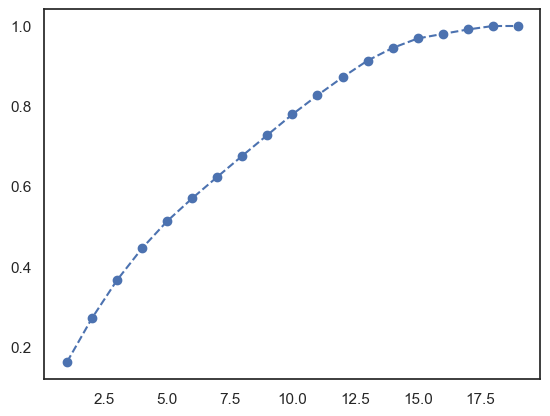

In [156]:
# Draw a chart of the proportion of cumulative explanatory variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')

In [157]:
# Using PCA for dimensionality reduction
n_components = 15  # Choose to retain 20 principal components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

In [159]:
df_1.info()
print("Explained Variance Ratios:", explained_variance_ratio[:n_components])

cumulative_variance_ratio = explained_variance_ratio.cumsum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [160]:
# data projection
# Create a PCA model and select dimensions after dimensionality reduction
n_projection_components = 2  # Select the number of dimensions to reduce to
pca_projection = PCA(n_components=n_projection_components)

# Using PCA model to fit merged projection dimensionality reduced data
X_projected = pca_projection.fit_transform(X_reduced)

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [53]:
# 06-DMA

In [54]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
import pyspark.sql.functions as F
from pyspark.sql.types import DoubleType
from pyspark.mllib.evaluation import MulticlassMetrics

In [55]:
# 1. 特征工程：将特征列组装成一个特征向量
feature_columns = indexed_df.columns[1:]  # 选择除了目标变量以外的所有特征列
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(indexed_df)

indexer = StringIndexer(inputCol="Attrition_Flag", outputCol="label")
data = indexer.fit(data).transform(data)

In [56]:
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

In [57]:
rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100, maxDepth=5, seed=42)

In [58]:
model = rf_classifier.fit(train_data)

In [59]:
predictions = model.transform(test_data)

In [60]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)
print("Precision:", precision)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)
print("Recall:", recall)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(predictions)
print("F1 Score:", f1)

binary_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
roc_auc = binary_evaluator.evaluate(predictions)
print("ROC AUC:", roc_auc)

Accuracy: 0.9081597814953909
Precision: 0.9089498821915422
Recall: 0.9081597814953909
F1 Score: 0.8948617161872259
ROC AUC: 0.9625633268526924


In [61]:
predictions.select("Attrition_Flag", "prediction", "probability").show()

+--------------+----------+--------------------+
|Attrition_Flag|prediction|         probability|
+--------------+----------+--------------------+
|             0|       0.0|[0.66114712599127...|
|             0|       0.0|[0.91784552622003...|
|             0|       0.0|[0.64530632736742...|
|             0|       0.0|[0.87128592272525...|
|             0|       0.0|[0.93548986065046...|
|             0|       0.0|[0.63795932737081...|
|             0|       0.0|[0.70464579257320...|
|             0|       0.0|[0.72160630529196...|
|             0|       0.0|[0.89926173283727...|
|             0|       0.0|[0.64728456096245...|
|             0|       0.0|[0.88389379249244...|
|             0|       0.0|[0.92074569182211...|
|             0|       0.0|[0.88377846069071...|
|             0|       0.0|[0.67861641073996...|
|             0|       0.0|[0.61689680070745...|
|             0|       0.0|[0.71025933695364...|
|             0|       0.0|[0.82024238704777...|
|             0|    

In [62]:
indexed_df.printSchema()
row_count1 = indexed_df.count()
num_columns1 = len(indexed_df.columns)
print (row_count1,num_columns1)

root
 |-- Attrition_Flag: integer (nullable = false)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Education_Level_index: double (nullable = false)
 |-- Marital_Status_index: double (nullable = false)
 |-- Income_Category_index: double (nullable = false)
 |-- Card_Category_index: double (nullable = false)
 |-- Age_Group_Index: double (nullable = false)
 |-- Register_Group_Index: double (nullable = false)

10127 18


In [63]:
#C&R tree

In [64]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

In [65]:
feature_columns = indexed_df.columns[1:]  # 选择除了目标变量以外的所有特征列
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data1 = assembler.transform(indexed_df)

In [66]:
indexer = StringIndexer(inputCol="Attrition_Flag", outputCol="label")
data1 = indexer.fit(data1).transform(data1)

In [67]:
train_data, test_data = data1.randomSplit([0.7, 0.3], seed=42)

In [68]:
dt_classifier = DecisionTreeClassifier(labelCol="label", featuresCol="features")

In [69]:
model = dt_classifier.fit(train_data)

In [70]:
predictions = model.transform(test_data)

In [71]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)
print("Precision:", precision)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)
print("Recall:", recall)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(predictions)
print("F1 Score:", f1)

binary_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
roc_auc = binary_evaluator.evaluate(predictions)
print("ROC AUC:", roc_auc)

Accuracy: 0.9252304540798908


Precision: 0.9218658503645836
Recall: 0.9252304540798907
F1 Score: 0.9223159301427204
ROC AUC: 0.8958222734735637


In [72]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler, StringIndexer

In [73]:
feature_columns = indexed_df.columns[1:]  # 选择除了目标变量以外的所有特征列
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data1 = assembler.transform(indexed_df)

In [74]:
indexer = StringIndexer(inputCol="Attrition_Flag", outputCol="label")
data1 = indexer.fit(data1).transform(data1)

In [75]:
train_data, test_data = data1.randomSplit([0.7, 0.3], seed=42)

In [76]:
# 训练Logistic Regression模型
lr = LogisticRegression(featuresCol="features", labelCol="label", maxIter=10, regParam=0.3, elasticNetParam=0.8)
model = lr.fit(train_data)

In [77]:
# 在测试数据上进行预测
predictions = model.transform(test_data)

In [78]:
# 计算准确率、精确度、召回率和F1分数
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)
print(f"Precision: {precision}")

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)
print(f"Recall: {recall}")

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(predictions)
print(f"F1 Score: {f1}")

# 计算AUC
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

Accuracy: 0.8426083987709115
Precision: 0.7099889136792795
Recall: 0.8426083987709115
F1 Score: 0.7706346222592587
AUC: 0.5


In [79]:
#XGBoost 

In [80]:
import pyspark
from pyspark.sql import SparkSession
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [81]:
feature_columns = indexed_df.columns[1:]  # 选择除了目标变量以外的所有特征列
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data2 = assembler.transform(indexed_df)

In [82]:
indexer = StringIndexer(inputCol="Attrition_Flag", outputCol="label")
data2 = indexer.fit(data2).transform(data2)

In [83]:
train_data, test_data = data2.randomSplit([0.7, 0.3], seed=42)

In [84]:
# 转换为Pandas DataFrame
data_pd = train_data.toPandas()

# 将数据转换为XGBoost的DMatrix格式
dtrain = xgb.DMatrix(data_pd[feature_columns], label=data_pd["label"])

In [85]:
params = {
    "objective": "binary:logistic",
    "max_depth": 5,
    "eta": 0.1,
    "eval_metric": "logloss"
}

In [86]:
# 训练XGBoost模型
model = xgb.train(params, dtrain, num_boost_round=100)

In [87]:
# 在测试数据上进行预测
test_data_pd = test_data.toPandas()
dtest = xgb.DMatrix(test_data_pd[feature_columns])
predictions = model.predict(dtest)

In [88]:
# 计算二进制分类的真实标签
true_labels = test_data_pd["label"]

# 计算准确率
accuracy = accuracy_score(true_labels, (predictions > 0.5).astype(int))
print(f"Accuracy: {accuracy}")

# 计算精确度
precision = precision_score(true_labels, (predictions > 0.5).astype(int))
print(f"Precision: {precision}")

# 计算召回率
recall = recall_score(true_labels, (predictions > 0.5).astype(int))
print(f"Recall: {recall}")

# 计算F1分数
f1 = f1_score(true_labels, (predictions > 0.5).astype(int))
print(f"F1 Score: {f1}")

# 计算AUC
auc = roc_auc_score(true_labels, predictions)
print(f"AUC: {auc}")

Accuracy: 0.9621031068624104
Precision: 0.9050925925925926
Recall: 0.8481561822125814
F1 Score: 0.8756998880179171
AUC: 0.9868573708765035


In [89]:
#6.3Parameter tuning

In [163]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline

# Create a C&R Tree model
dt_classifier = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# Create an evaluator (here we use accuracy as the evaluation metric, you can choose other metrics as needed)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Create a parameter grid
param_grid = ParamGridBuilder() \
    .addGrid(dt_classifier.maxDepth, [5, 7, 10, 15]) \
    .addGrid(dt_classifier.minInstancesPerNode, [1, 2, 4, 6]) \
    .addGrid(dt_classifier.minInfoGain, [0.0, 0.1, 0.2]) \
    .addGrid(dt_classifier.impurity, ["entropy", "gini"]) \
    .build()

# Create a CrossValidator object
crossval = CrossValidator(estimator=dt_classifier,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=5)

In [164]:
feature_columns = indexed_df.columns[1:]  #Select all feature columns except the target variable.
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data2 = assembler.transform(indexed_df)

indexer = StringIndexer(inputCol="Attrition_Flag", outputCol="label")
data2 = indexer.fit(data2).transform(data2)

train_data, test_data = data2.randomSplit([0.7, 0.3], seed=42)

In [165]:
# Run cross-validation to select the best parameters
cv_model = crossval.fit(train_data)

# Get the best model
best_model = cv_model.bestModel

In [166]:
# Get the best model
best_max_depth = best_model.getMaxDepth()
best_min_instances_per_node = best_model.getMinInstancesPerNode()
best_min_info_gain = best_model.getMinInfoGain()
best_impurity = best_model.getImpurity()

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Instances Per Node: {best_min_instances_per_node}")
print(f"Best Min Info Gain: {best_min_info_gain}")
print(f"Best impurity: {best_impurity}")

Best Max Depth: 10
Best Min Instances Per Node: 4
Best Min Info Gain: 0.0
Best impurity: gini


In [94]:
#Execute the model with the best parameters

In [167]:
predictions = cv_model.transform(test_data)

In [168]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)
print("Precision:", precision)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)
print("Recall:", recall)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(predictions)
print("F1 Score:", f1)

binary_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
roc_auc = binary_evaluator.evaluate(predictions)
print("ROC AUC:", roc_auc)

Accuracy: 0.9300102424035507
Precision: 0.9278903792778955
Recall: 0.9300102424035508
F1 Score: 0.9286005453089441
ROC AUC: 0.8051453397413134


In [169]:
# Obtain feature names and their corresponding importance
feature_names = feature_columns
feature_importances = best_model.featureImportances

In [170]:
# Create a tuple list containing feature names and corresponding importance
feature_importance_tuples = [(name, importance) for name, importance in zip(feature_names, feature_importances)]

# Sort the importance of features in descending order of importance
sorted_feature_importance_tuples = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# 打The importance of features after printing sorting
for name, importance in sorted_feature_importance_tuples:
    print(f"Feature '{name}': Importance {importance:.4f}")

Feature 'Total_Trans_Ct': Importance 0.3672
Feature 'Total_Trans_Amt': Importance 0.1932
Feature 'Total_Relationship_Count': Importance 0.1578
Feature 'Total_Amt_Chng_Q4_Q1': Importance 0.1223
Feature 'Customer_Age': Importance 0.0428
Feature 'Avg_Open_To_Buy': Importance 0.0237
Feature 'Months_Inactive_12_mon': Importance 0.0199
Feature 'Credit_Limit': Importance 0.0159
Feature 'Income_Category_index': Importance 0.0130
Feature 'Gender': Importance 0.0103
Feature 'Education_Level_index': Importance 0.0086
Feature 'Dependent_count': Importance 0.0075
Feature 'Marital_Status_index': Importance 0.0073
Feature 'Months_on_book': Importance 0.0056
Feature 'Register_Group_Index': Importance 0.0030
Feature 'Age_Group_Index': Importance 0.0020
Feature 'Card_Category_index': Importance 0.0000


Feature Importance Results:

Feature Name                   Importance     
---------------------------------------------
Total_Trans_Ct                 0.3672         
Total_Trans_Amt                0.1932         
Total_Relationship_Count       0.1578         
Total_Amt_Chng_Q4_Q1           0.1223         
Customer_Age                   0.0428         
Avg_Open_To_Buy                0.0237         
Months_Inactive_12_mon         0.0199         
Credit_Limit                   0.0159         
Income_Category_index          0.0130         
Gender                         0.0103         
Education_Level_index          0.0086         
Dependent_count                0.0075         
Marital_Status_index           0.0073         
Months_on_book                 0.0056         
Register_Group_Index           0.0030         
Age_Group_Index                0.0020         
Card_Category_index            0.0000         


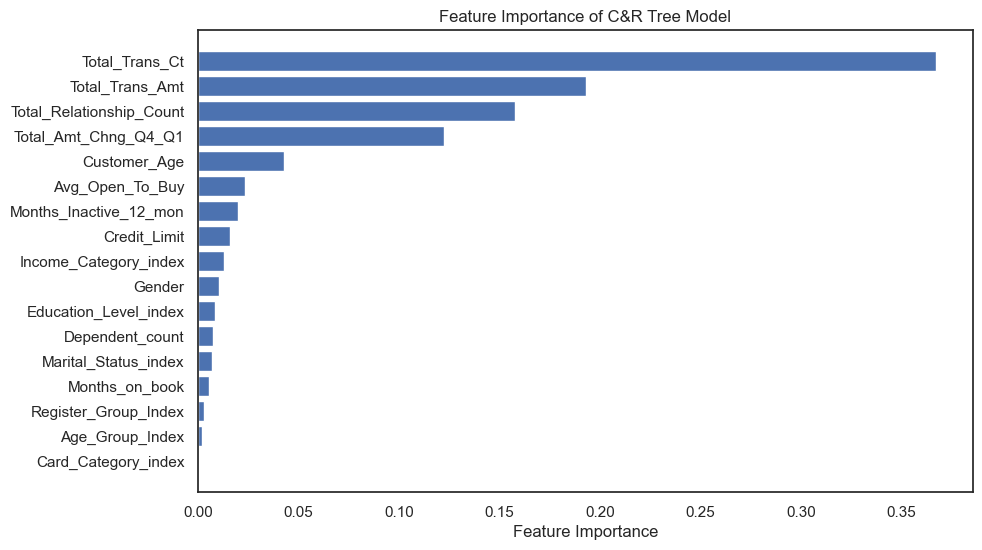

In [173]:
import matplotlib.pyplot as plt

# Get feature names and their corresponding importance scores
feature_names = feature_columns
feature_importances = best_model.featureImportances

# Create a list of tuples containing feature names and their importances
feature_importance_tuples = [(name, importance) for name, importance in zip(feature_names, feature_importances)]

# Sort feature importances in descending order
sorted_feature_importance_tuples = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names, sorted_feature_importances = zip(*sorted_feature_importance_tuples)

# Print feature importance results
print("Feature Importance Results:")
print("\n{:<30} {:<15}".format("Feature Name", "Importance"))
print("-" * 45)
for name, importance in sorted_feature_importance_tuples:
    print("{:<30} {:<15.4f}".format(name, importance))

# Create a horizontal bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance of C&R Tree Model')
plt.gca().invert_yaxis()  # Invert the y-axis to display high-importance features at the top
plt.show()

In [172]:
predictions.select("Attrition_Flag", "prediction", "probability").show()

+--------------+----------+--------------------+
|Attrition_Flag|prediction|         probability|
+--------------+----------+--------------------+
|             0|       0.0|           [1.0,0.0]|
|             0|       0.0|[0.97520661157024...|
|             0|       0.0|           [1.0,0.0]|
|             0|       1.0|[0.33333333333333...|
|             0|       0.0|[0.99863991839510...|
|             0|       0.0|[0.86363636363636...|
|             0|       0.0|           [1.0,0.0]|
|             0|       0.0|[0.86363636363636...|
|             0|       0.0|[0.99863991839510...|
|             0|       0.0|           [1.0,0.0]|
|             0|       0.0|[0.96587030716723...|
|             0|       0.0|[0.99863991839510...|
|             0|       0.0|[0.96587030716723...|
|             0|       0.0|           [1.0,0.0]|
|             0|       0.0|           [1.0,0.0]|
|             0|       0.0|[0.92592592592592...|
|             0|       0.0|[0.99863991839510...|
|             0|    

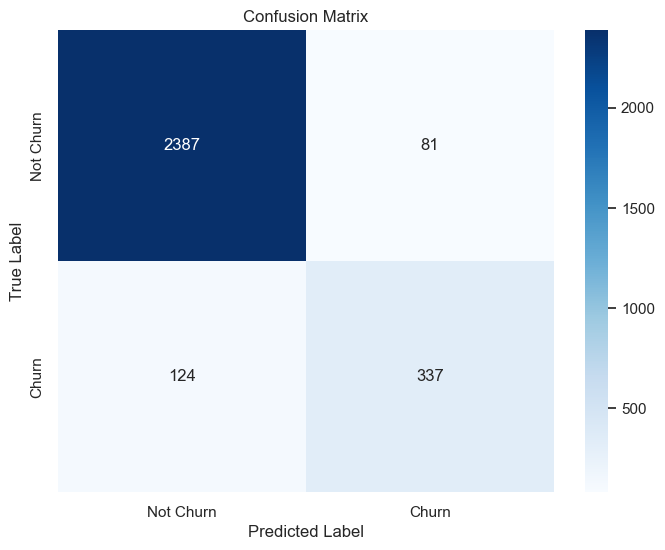

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = predictions.select("Attrition_Flag").rdd.flatMap(lambda x: x).collect()
y_pred = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

# Get the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

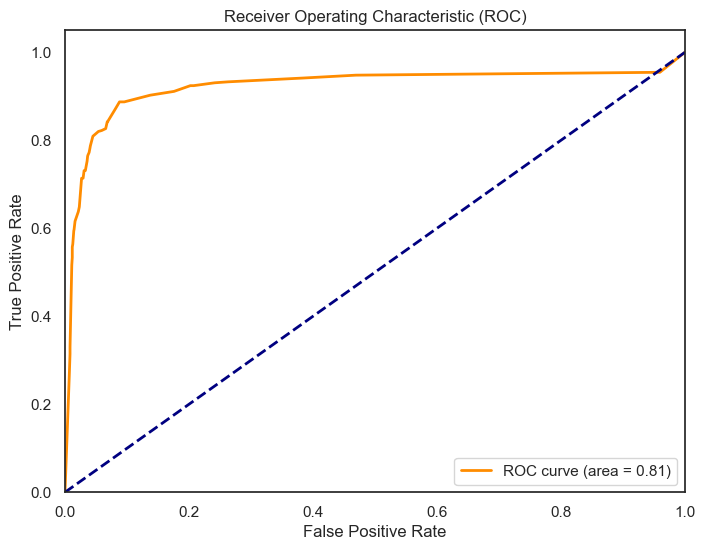

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# First, we need to extract the probability of the positive class from the predictions
# Assuming your 'probability' column is a column of Vectors, you'd do:
probabilities = predictions.select("probability").rdd.map(lambda x: x[0][1]).collect()

y_true = predictions.select("Attrition_Flag").rdd.flatMap(lambda x: x).collect()

# Calculate ROC
roc_auc = binary_evaluator.evaluate(predictions)

# Plot
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [189]:
from pyspark.ml.classification import DecisionTreeClassificationModel
from pyspark.ml import PipelineModel

tree_model = best_model.stages[-1] if isinstance(best_model, PipelineModel) else best_model

# Get the tree's logic/rules
tree_rules = tree_model.toDebugString

feature_names = indexed_df.columns

# Replace "feature i" with the actual column name
for i, feature_name in enumerate(feature_names):
    tree_rules = tree_rules.replace(f"feature {i}", feature_name)

# Save to a text file
with open("decision_tree_rules1.txt", "w") as file:
    file.write(tree_rules)